### Assignment 3 
Subscribing to Term Deposit

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly as py
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Reading dataset into dataframe
dataframe_bank_deposit = pd.read_csv("bank-full.csv")

In [3]:
#Getting top 10 values to get a read of data
dataframe_bank_deposit.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
dataframe_bank_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Shape of data
dataframe_bank_deposit.shape

(45211, 17)

In [6]:
#Data types of attributes
dataframe_bank_deposit.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
#Checking null values
print("Null values: only null values present in dataframe ?",dataframe_bank_deposit.isnull().values.any())
dataframe_bank_deposit.isnull().sum()

Null values: only null values present in dataframe ? False


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:
#5 Point summary
dataframe_bank_deposit.describe()
#There can be some outliers as displayed in the above method, balance mean is 1362 and even after considering the std. deviation, max is way out of reasonable bounds.
#So can be the case with campaigns and duration as well.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
#Finding unique values using lambda function 
dataframe_bank_deposit.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

As we can see, there are many unknown variables as part of categories.
Before we move further, we should treat them so as to remove any data or information that can be misinterpreted.

Generating graphs for better understanding of data

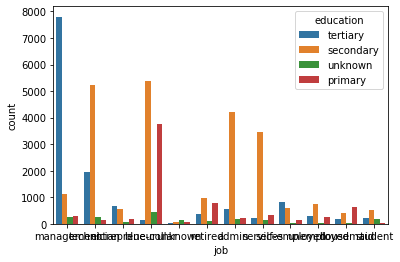

In [10]:
sns.countplot(dataframe_bank_deposit["job"],hue=dataframe_bank_deposit["education"])

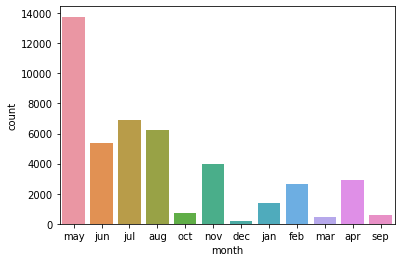

In [11]:
sns.countplot(dataframe_bank_deposit["month"])

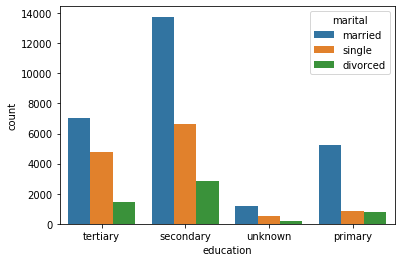

In [12]:
sns.countplot(dataframe_bank_deposit["education"],hue=dataframe_bank_deposit["marital"])

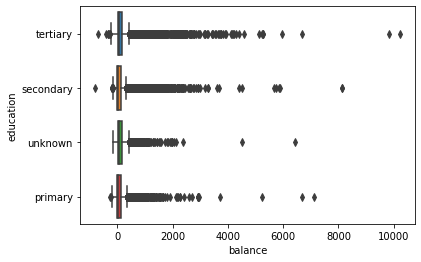

In [13]:
sns.boxplot(x=(dataframe_bank_deposit["balance"]/10),y=dataframe_bank_deposit["education"])

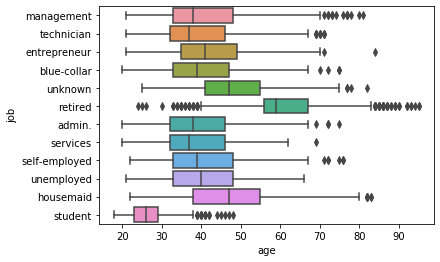

In [15]:
sns.boxplot(x=dataframe_bank_deposit["age"],y=dataframe_bank_deposit["job"])

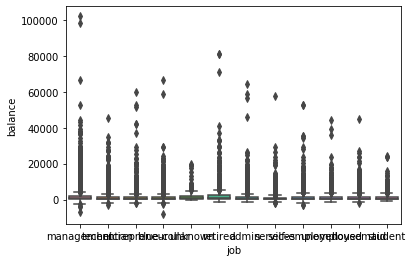

In [16]:
sns.boxplot(x=dataframe_bank_deposit["job"],y=dataframe_bank_deposit["balance"],orient="v")

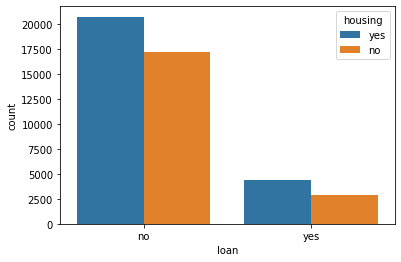

In [17]:
sns.countplot(data=dataframe_bank_deposit,x="loan",hue="housing")

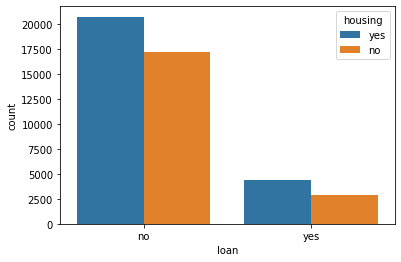

In [18]:
sns.countplot(data=dataframe_bank_deposit,x="loan",hue="housing")

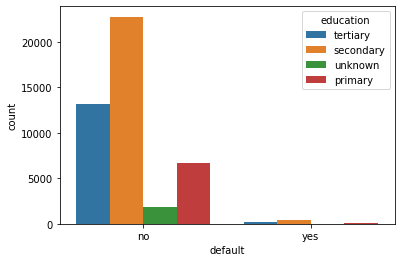

In [20]:
sns.countplot(data=dataframe_bank_deposit,x="default",hue="education")

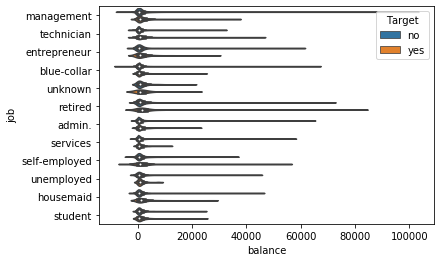

In [21]:
sns.violinplot(x="balance", y="job", hue="Target",data=dataframe_bank_deposit);

As observed, there are multiple attributes that can not be utilized as they are of type object(String or non int).
Therefore, we are going to replace those values with categorical values.

In [22]:
dataframe_bank_deposit["job"] = pd.factorize(dataframe_bank_deposit.job)[0] + 1
dataframe_bank_deposit["marital"] = pd.factorize(dataframe_bank_deposit.marital)[0] + 1
dataframe_bank_deposit["education"] = pd.factorize(dataframe_bank_deposit.education)[0] + 1
dataframe_bank_deposit["housing"] = pd.factorize(dataframe_bank_deposit.housing)[0] + 1
dataframe_bank_deposit["loan"] = pd.factorize(dataframe_bank_deposit.loan)[0] + 1
dataframe_bank_deposit["poutcome"]=pd.factorize(dataframe_bank_deposit.poutcome)[0] + 1
dataframe_bank_deposit["default"]=pd.factorize(dataframe_bank_deposit.default)[0] + 1
dataframe_bank_deposit["Target"]=pd.factorize(dataframe_bank_deposit.Target)[0] + 1

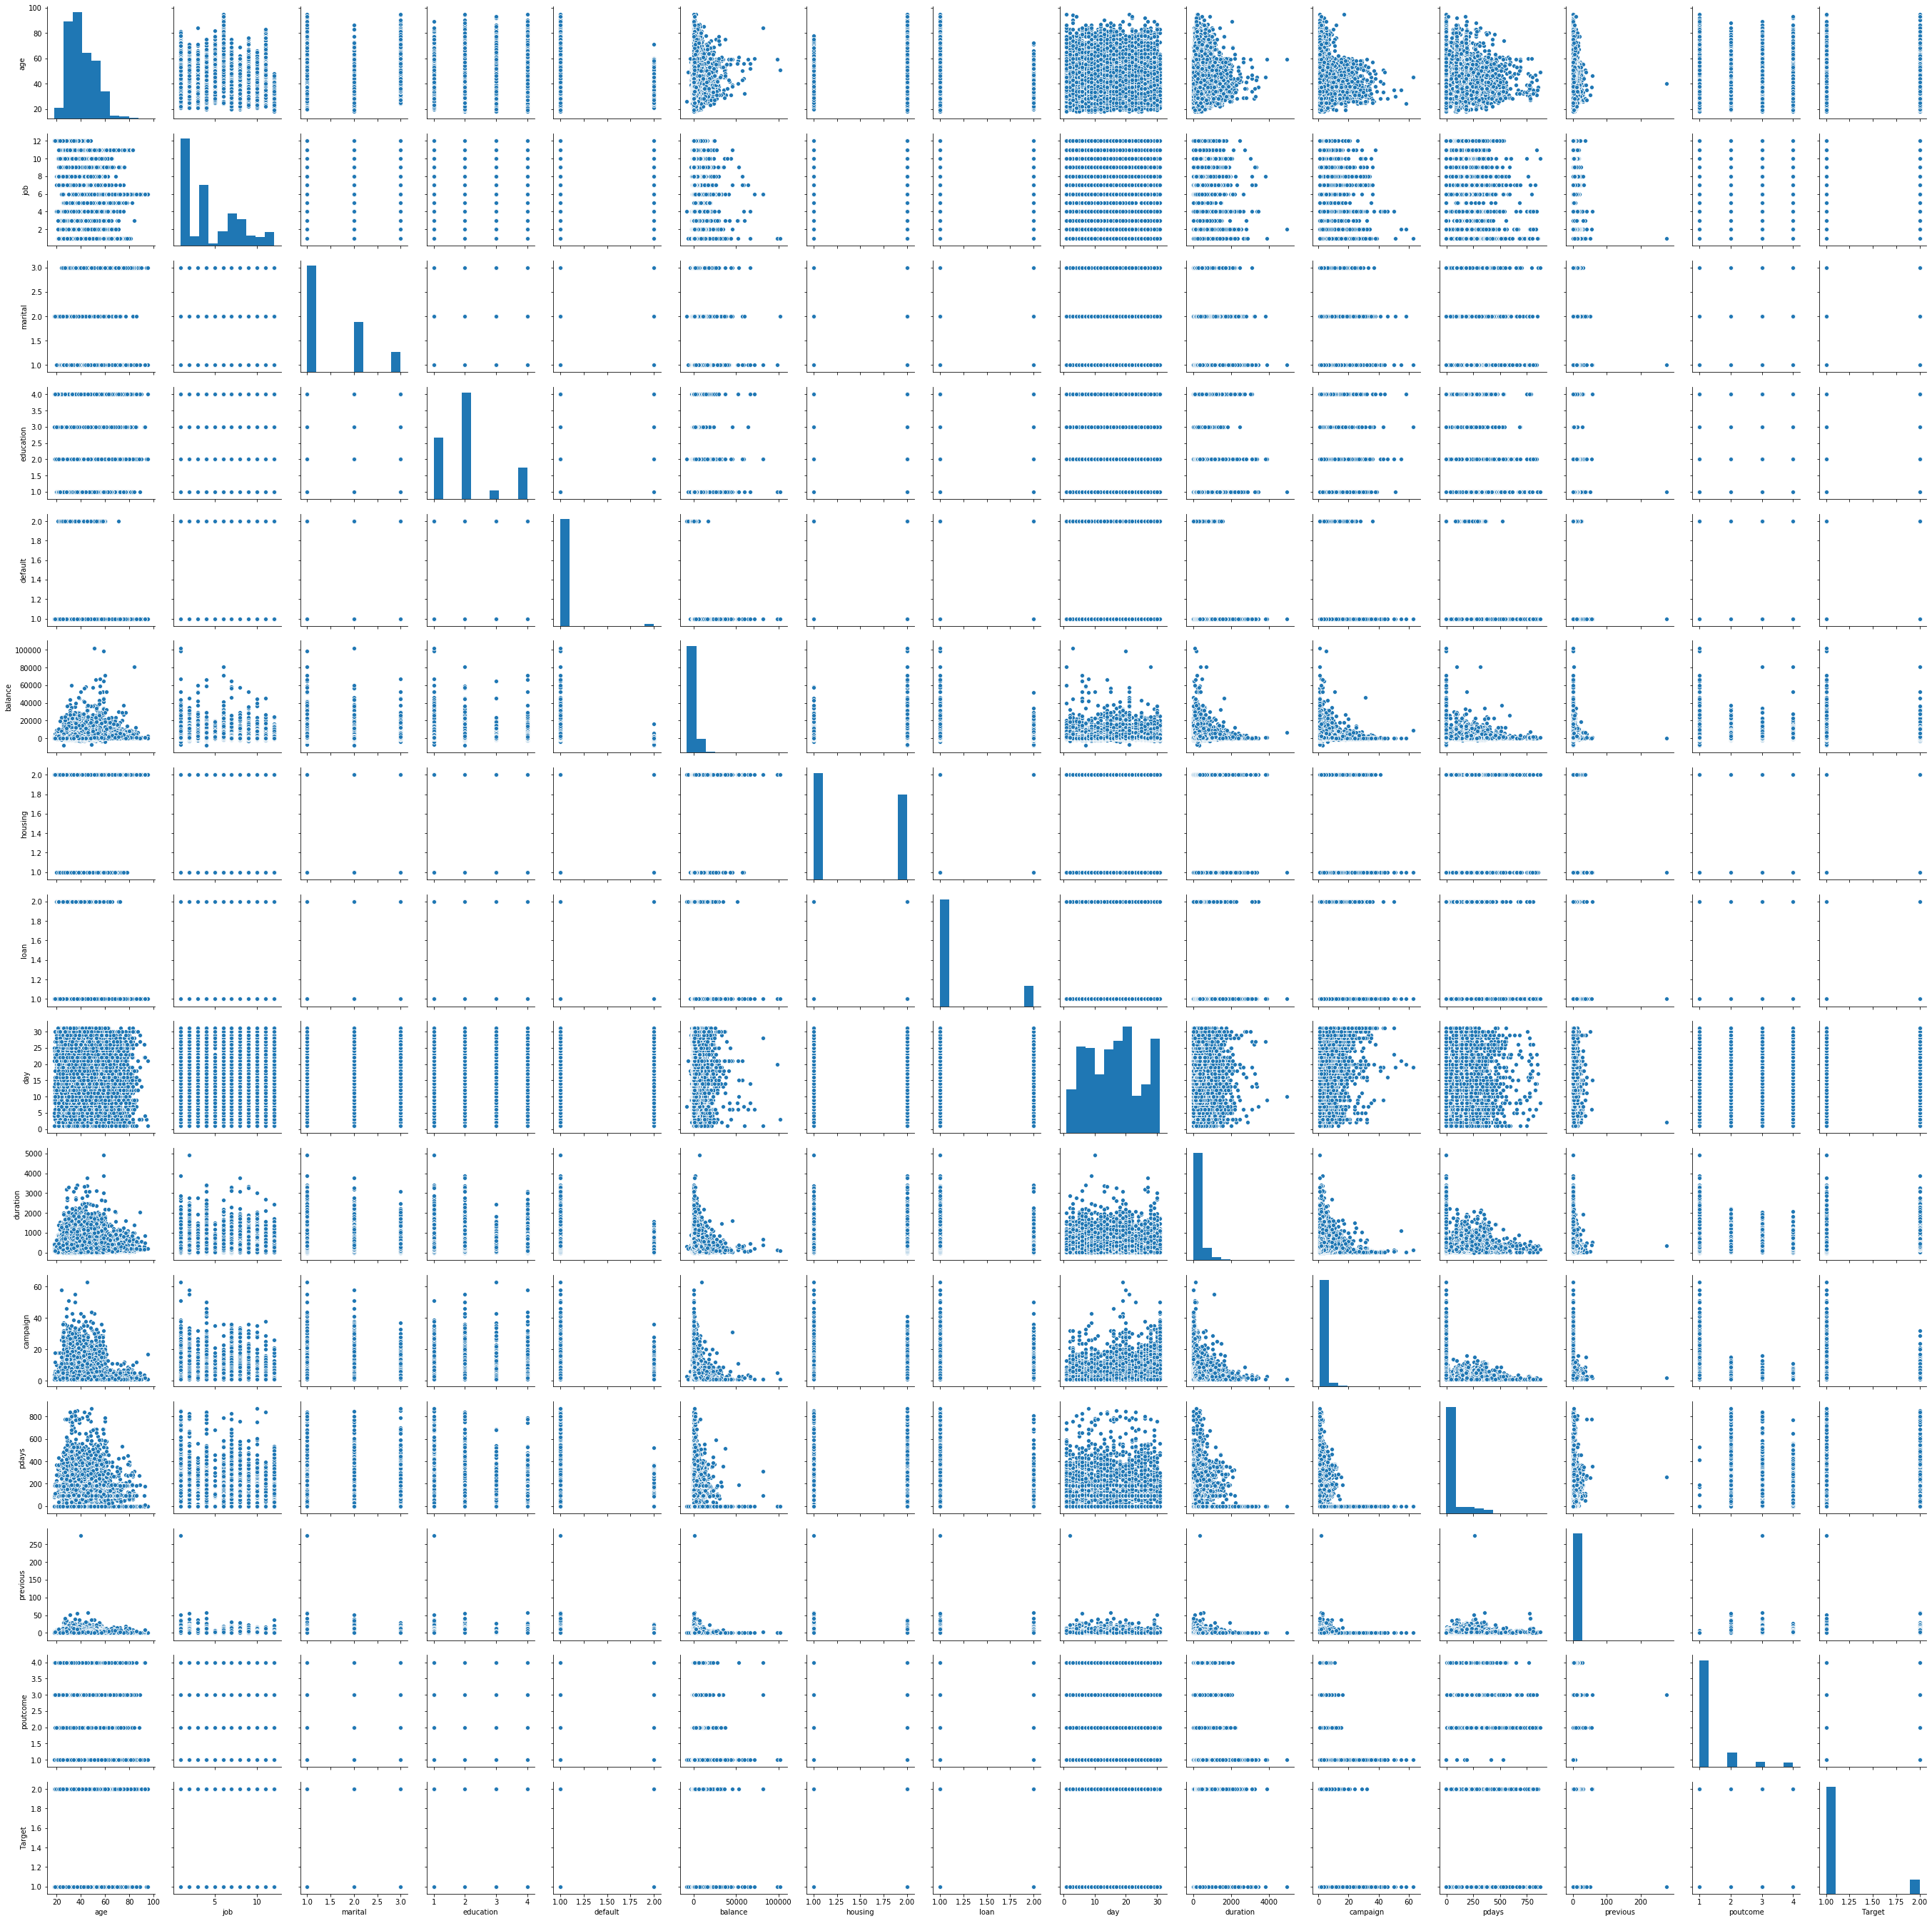

In [23]:
sns.pairplot(dataframe_bank_deposit)

In [24]:
correlation = dataframe_bank_deposit.corr()
print(correlation)

                age       job   marital  education   default   balance  \
age        1.000000  0.004262 -0.126351   0.197850 -0.017879  0.097783   
job        0.004262  1.000000  0.025000   0.259541 -0.007340 -0.029654   
marital   -0.126351  0.025000  1.000000  -0.109133  0.018404 -0.028172   
education  0.197850  0.259541 -0.109133   1.000000  0.008114 -0.048649   
default   -0.017879 -0.007340  0.018404   0.008114  1.000000 -0.066745   
balance    0.097783 -0.029654 -0.028172  -0.048649 -0.066745  1.000000   
housing    0.185513  0.041317  0.011671  -0.044788  0.006025  0.068768   
loan      -0.015655 -0.012578 -0.018526   0.002191  0.077234 -0.084350   
day       -0.009120 -0.027535 -0.005217  -0.024666  0.009424  0.004503   
duration  -0.004648  0.008166  0.018834  -0.003267 -0.010021  0.021560   
campaign   0.004760 -0.035410 -0.029294   0.002234  0.016822 -0.014578   
pdays     -0.023758  0.007492  0.020832  -0.010713 -0.029979  0.003435   
previous   0.001288 -0.006466  0.00687

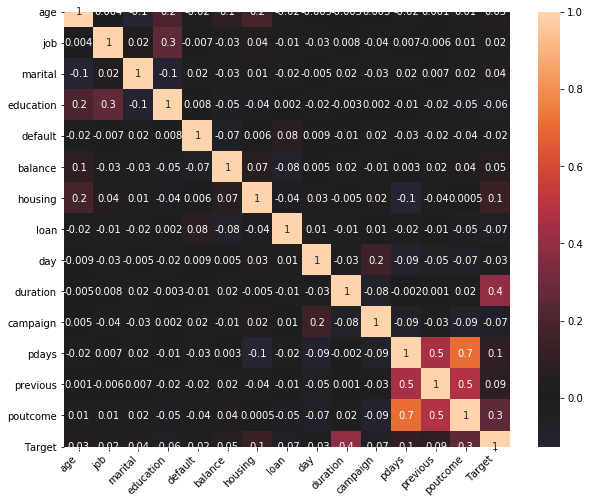

In [25]:
plt.figure(figsize=(10,8))
sns.set_context(font_scale=0.8, rc={"lines.linewidth": 2.0})
ax = sns.heatmap(
    correlation,
      center=0,
    annot=True,
    fmt = '.1g'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As observed, there is high correlation between pdays (0.5).
There is also a significant correlation between duration, month, campaign, pdays and previous, housing, education and marital.
Considering all these attributes, we are going to drop loan and default attribute

In [56]:
#As discussed above, we will be dropping 
train_set, test_set = train_test_split(dataframe_bank_deposit.drop(["loan","default","contact","month","marital"], axis=1), test_size=0.30 , random_state=1)
train_set.shape,test_set.shape

((31647, 12), (13564, 12))

In [57]:

train_set_indep = dataframe_bank_deposit.drop(["loan","default","contact","month","marital"], axis=1).drop(labels= "Target" , axis = 1)
train_set_dep = dataframe_bank_deposit["Target"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :35000, :]
X_Test = X[35001: , :]
Y_Train = Y[:35000, ]
Y_Test = Y[35001:, ]

In [58]:
train_set_indep.dtypes

age          int64
job          int64
education    int64
balance      int64
housing      int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [59]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_Train,Y_Train.ravel())
training_set_labels = train_set.pop("Target")
test_set_labels = test_set.pop("Target")
naive_model.fit(train_set, training_set_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_set_labels)

0.8574904158065467

In [60]:
#KNN Classification
#not specefying neibhours
knn = KNeighborsClassifier(weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)
#Accuracy for KNN is 80.2

knn_matrix=metrics.confusion_matrix(Y_Test, predicted, labels=[1, 0])
print(knn_matrix)

0.7212536728697355
[[7166    0]
 [   0    0]]


In [61]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [62]:
model_entropy.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
model_entropy.score(X_Train, Y_Train)  # performance on train data

1.0

In [64]:
model_entropy.score(X_Test, Y_Test)  # performance on test data

0.7115572967678746

Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [65]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_Train, Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [66]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

xvar = dataframe_bank_deposit.drop("Target", axis=1)
feature_cols = xvar.columns

In [67]:
preds_pruned = clf_pruned.predict(X_Test)
preds_pruned_train = clf_pruned.predict(X_Train)

In [68]:
print(accuracy_score(Y_Test,preds_pruned))
print(accuracy_score(Y_Train,preds_pruned_train))

0.7216454456415279
0.9379142857142857


In [69]:
acc_DT = accuracy_score(Y_Test, preds_pruned)

In [70]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
housing,0.942772
age,0.031907
balance,0.025321
job,0.000000
marital,0.000000
education,0.000000
default,0.000000
loan,0.000000
contact,0.000000
day,0.000000


In [71]:
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.721645


### Apply the Random forest model and print the accuracy of Random forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_Train, Y_Train)

In [73]:
pred_RF = rfcl.predict(X_Test)
acc_RF = accuracy_score(Y_Test, pred_RF)

In [74]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.721645
0,Random Forest,0.727228


## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_Train, Y_Train)

In [76]:
pred_AB =abcl.predict(X_Test)
acc_AB = accuracy_score(Y_Test, pred_AB)

In [77]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.721645
0,Random Forest,0.727228
0,Adaboost,0.728697


In [78]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_Train, Y_Train)

In [79]:
pred_BG =bgcl.predict(X_Test)
acc_BG = accuracy_score(Y_Test, pred_BG)

In [80]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.721645
0,Random Forest,0.727228
0,Adaboost,0.728697
0,Bagging,0.733399
